# 1.Supervised Learning Implementations

### Linear Regression (for Regression problems)

`Goal:` predict a continuous variable based on `one` or `more input variable`

`Mathematical Idea`: Find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the predicted values and the actual values.

The equation for a simple linear regression is `y = mx + b`, where:

* y is the predicted output.
* m is the slope.
* x is the input feature.
* b is the y-intercept.

In multiple linear regression, it becomes $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$.



**How to find m and b (or betas)?**

**We use a method called Ordinary Least Squares (OLS)**. The formulas for m and b (for simple linear regression) derived from OLS are:

$$
m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

$$
b = \bar{y} - m \bar{x}
$$

Where $\bar{x} and \bar{y}$ are the means of x and y respectively.

**Linear Regression with scikit-learn**

This is much simpler and more robust, especially for multiple features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# 1. Prepare Data of feature(X) and target(y)

# Generate Sample Data
np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + noise

In [7]:
# 2. Split data into training and testing sets
# This cruical for evaluating how well the model generalizes to unseen data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
# 3. Instantiate and train the model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

print(f"\nScikit-learn Model Coefficients: {model_sklearn.coef_[0][0]:.4f}, \nIntercept: {model_sklearn.intercept_[0]:.4f}")


Scikit-learn Model Coefficients: 2.9903, 
Intercept: 4.2063


In [9]:
# 4.Make predictions on the test set
y_pred_sklearn = model_sklearn.predict(X_test)

In [10]:
# 5. Evaluate the model
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Sciki-learn : Mean Squared Error (MSE) on Test Set = {mse_sklearn:.4f}")
print(f"Scikit-learn: R-squared (R2) on Test Set = {r2_sklearn:.4f}")

Sciki-learn : Mean Squared Error (MSE) on Test Set = 0.9178
Scikit-learn: R-squared (R2) on Test Set = 0.6521


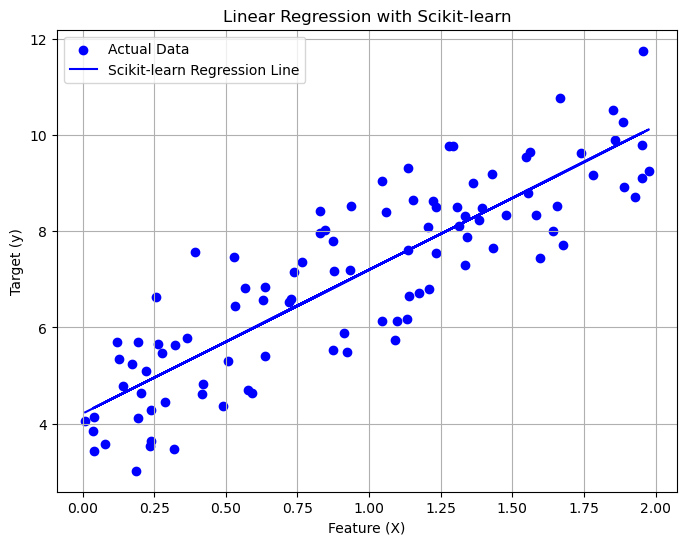

In [12]:
# plotting (using full X for Visualization though we trained on X_train)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model_sklearn.predict(X), color='blue', label='Scikit-learn Regression Line')
plt.title('Linear Regression with Scikit-learn')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid()
plt.show()